# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 2.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.6/760.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.0 MB/s eta 0:00:0016.9 MB/s eta 0:00:01
  Attempting uninstall: blis
    Found existing installation: blis 1.3.3
    Uninstalling blis-1.3.3:
      Successfully uninstalled blis-1.3.3
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.10
    Uninstalling thinc-8.3.10:
      Successfully uninstalled thinc-8.3.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.11
    Uninstalling spacy-3.8.11:
      Successfully uninstalled spacy-3.8.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 1.9 MB/s eta 0:00:001.9 MB/s eta 0:00:01
  Attempting uninstall: sci

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [5]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
# Import the first file - True.csv
df_true = pd.read_csv('True.csv')
# Import the second file - Fake.csv
df_fake = pd.read_csv('Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [7]:
# Inspect the DataFrame with True News to understand the given data
display(df_true.head())

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [9]:
# Inspect the DataFrame with Fake News to understand the given data
display(df_fake.head())

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [11]:
# Print the column details for True News DataFrame
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [13]:
# Print the column details for Fake News Dataframe
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [15]:
# Print the column names of both DataFrames
print(f"True News Columns: {df_true.columns.tolist()}")
print(f"Fake News Columns: {df_fake.columns.tolist()}")

True News Columns: ['title', 'text', 'date']
Fake News Columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [18]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [21]:
# Combine the true and fake news DataFrames into a single DataFrame
df_merged = pd.concat([df_true, df_fake], axis=0).reset_index(drop=True)

In [23]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("First 5 rows of merged DataFrame")
display(df_merged.head())

First 5 rows of merged DataFrame


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [26]:
# Check Presence of Null Values
print("Null values per column:")
print(df_merged.isnull().sum())

Null values per column:
title         21
text          21
date          42
news_label     0
dtype: int64


In [28]:
# Handle Rows with Null Values
df_merged.dropna(inplace=True)
print("\nNull values after handling:")
print(df_merged.isnull().sum())


Null values after handling:
title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [31]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df_merged['news_text'] = df_merged['title'] + " " + df_merged['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df_merged.drop(['title', 'text', 'date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
display(df_merged.head())

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [36]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df_merged['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [39]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
# Convert to lower case
    text = text.lower()
# Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
# Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
# Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [42]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df_merged['news_text'].apply(clean_text)
display(df_clean.head())

news_label                                       cleaned_text
0           1  as us budget fight looms republicans flip thei...
1           1  us military to accept transgender recruits on ...
2           1  senior us republican senator let mr mueller do...
3           1  fbi russia probe helped by australian diplomat...
4           1  trump wants postal service to charge much more...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [45]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def lemmatize_and_filter(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.tag_ in ['NN', 'NNS']]
    return " ".join(tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [49]:
# Apply POS tagging and lemmatization function to cleaned text
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(lemmatize_and_filter)
# Store it in a separate column in the new DataFrame


100%|█████████████████████████████████████| 44898/44898 [40:31<00:00, 18.46it/s]


### Save the Cleaned data as a csv file (Recommended)

In [51]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")
df_clean.to_csv("clean_df.csv", index=False)

In [53]:
# Check the first few rows of the DataFrame
display(df_clean[['cleaned_text', 'lemmatized_text']].head())

cleaned_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                     lemmatized_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...

In [55]:
# Check the dimensions of the DataFrame


In [57]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44898 non-null  object
 2   lemmatized_text  44898 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [59]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_clean, test_size=0.3, random_state=42)

print(f"Training set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")

Training set shape: (31428, 3)
Validation set shape: (13470, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [66]:
# Add a new column to calculate the character length of cleaned news text
df_train['clean_char_len'] = df_train['cleaned_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_train['lemmatized_char_len'] = df_train['lemmatized_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

<Figure size 1200x600 with 0 Axes>

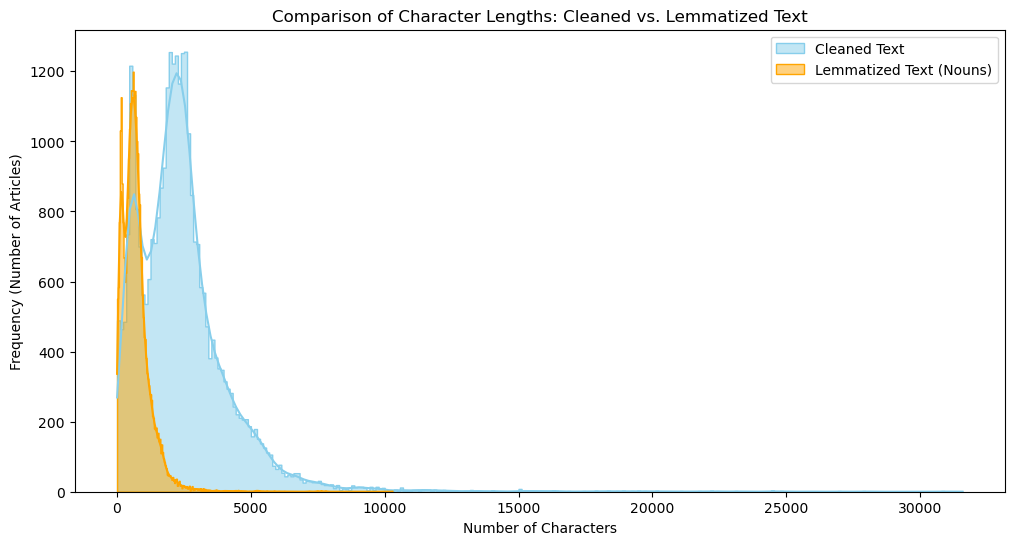

In [69]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(df_train['clean_char_len'], color="skyblue", label='Cleaned Text', kde=True, element="step")
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_train['lemmatized_char_len'], color="orange", label='Lemmatized Text (Nouns)', kde=True, element="step")
plt.title('Comparison of Character Lengths: Cleaned vs. Lemmatized Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency (Number of Articles)')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

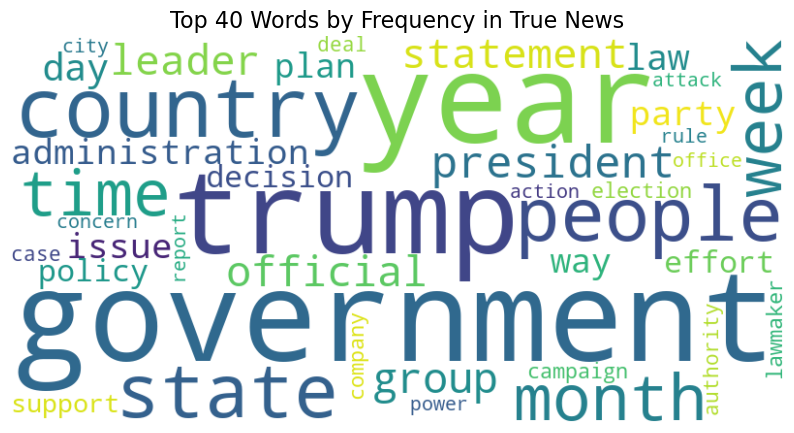

In [71]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = df_train[df_train['news_label'] == 1]['lemmatized_text'].astype(str).str.cat(sep=' ')
# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, 
                           height=400, 
                           background_color='white', 
                           max_words=40).generate(true_news_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words by Frequency in True News', fontsize=16)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

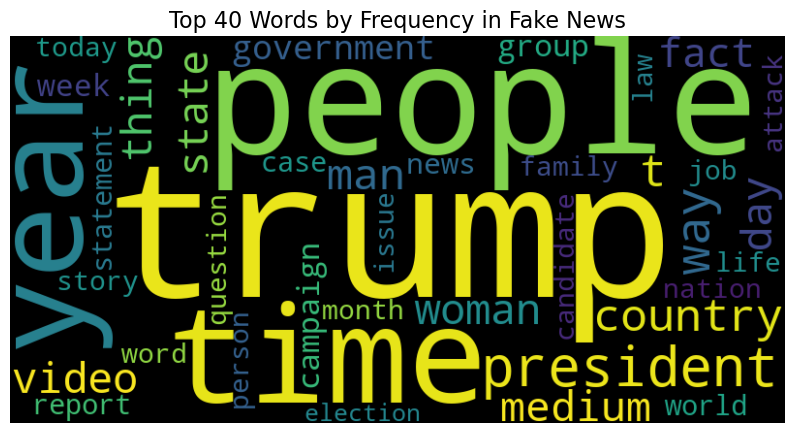

In [73]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = df_train[df_train['news_label'] == 0]['lemmatized_text'].astype(str).str.cat(sep=' ')
# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, 
                           height=400, 
                           background_color='black', # Using black background to contrast with True news
                           max_words=40).generate(fake_news_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words by Frequency in Fake News', fontsize=16)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [75]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n_gram_range=(2, 2), top_n=10):
    """
    Function to find the top n-grams in a given text corpus.
    n_gram_range: (2, 2) for bigrams, (3, 3) for trigrams
    top_n: Number of top phrases to return
    """
    vec = CountVectorizer(ngram_range=n_gram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    # Sum the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:top_n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [77]:
# Handle NaN values in the text data
print("NaN values before handling:", df_train['lemmatized_text'].isnull().sum())

df_train['lemmatized_text'].replace('', np.nan, inplace=True)

df_train.dropna(subset=['lemmatized_text'], inplace=True)

print("NaN values after handling:", df_train['lemmatized_text'].isnull().sum())

NaN values before handling: 0
NaN values after handling: 0


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
trump: 24656
state: 14400
government: 13750
year: 13188
people: 10728
election: 9964
country: 9904
official: 9110
party: 8357
campaign: 7676


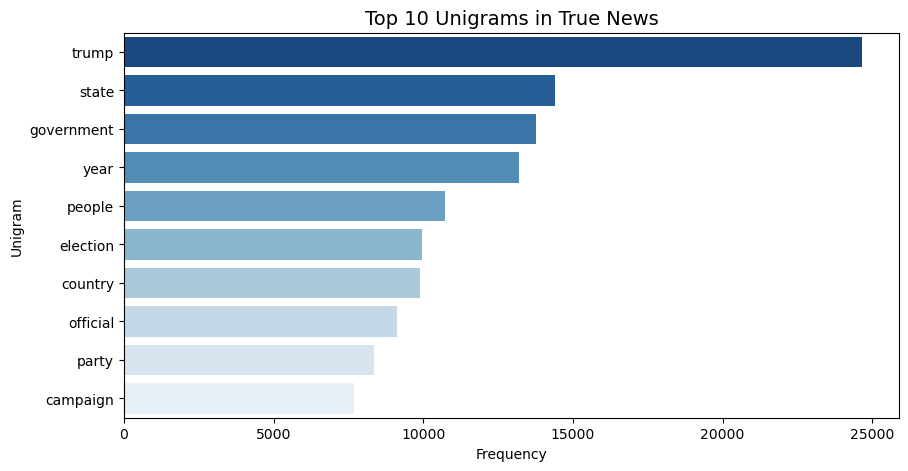

In [79]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_news_corpus = df_train[df_train['news_label'] == 1]['lemmatized_text'].astype(str)
top_unigrams_true = get_top_ngrams(true_news_corpus, n_gram_range=(1, 1), top_n=10)

print("Top 10 Unigrams in True News:")
for word, freq in top_unigrams_true:
    print(f"{word}: {freq}")
df_unigrams = pd.DataFrame(top_unigrams_true, columns=['Unigram', 'Frequency'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Unigram', data=df_unigrams, palette='Blues_r')
plt.title('Top 10 Unigrams in True News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
trump campaign: 1143
news conference: 952
percent percent: 776
climate change: 740
tax reform: 738
request comment: 704
security force: 683
house representative: 664
trump administration: 622
intelligence agency: 618


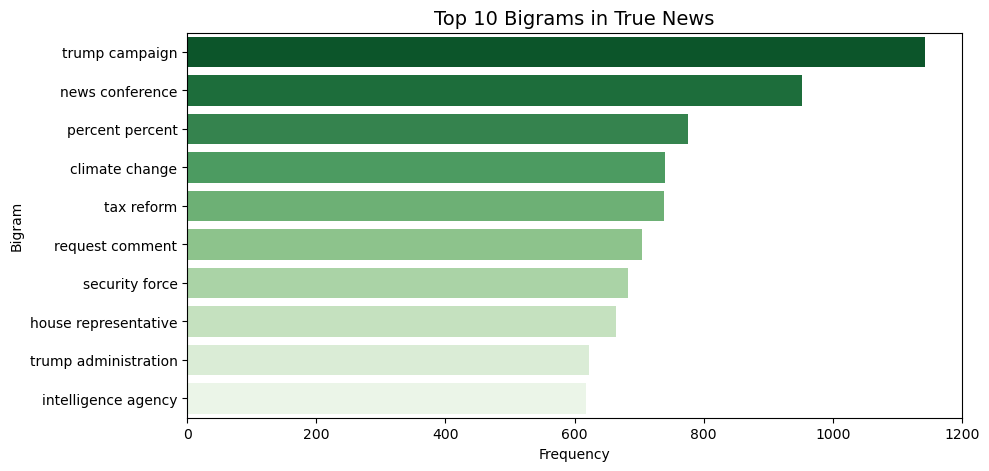

In [81]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(true_news_corpus, n_gram_range=(2, 2), top_n=10)


print("Top 10 Bigrams in True News:")
for word, freq in top_bigrams_true:
    print(f"{word}: {freq}")
df_bigrams = pd.DataFrame(top_bigrams_true, columns=['Bigram', 'Frequency'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Bigram', data=df_bigrams, palette='Greens_r')
plt.title('Top 10 Bigrams in True News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
official condition anonymity: 210
trump transition team: 168
tax rate percent: 166
article staff involvement: 131
staff involvement creation: 131
involvement creation production: 131
state department official: 126
rate percent percent: 117
circuit court appeal: 111
trump travel ban: 107


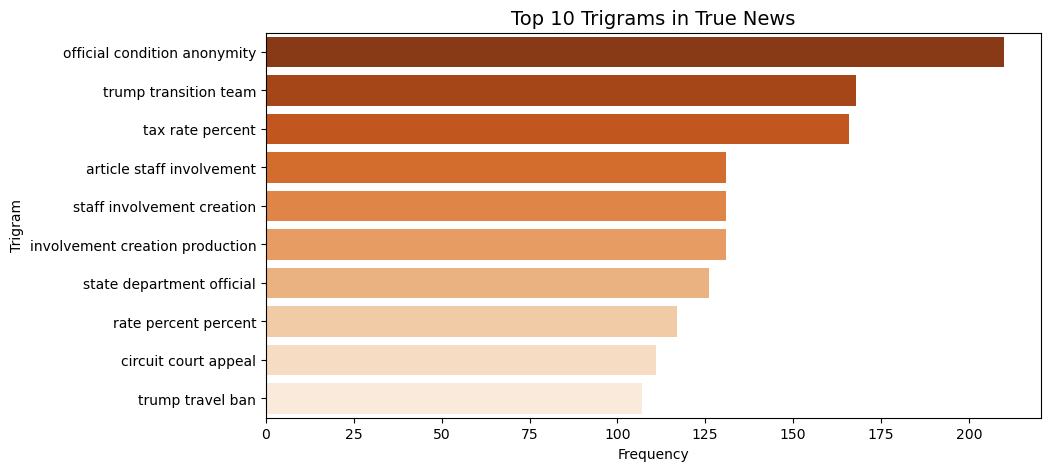

In [83]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(true_news_corpus, n_gram_range=(3, 3), top_n=10)
print("Top 10 Trigrams in True News:")
for word, freq in top_trigrams_true:
    print(f"{word}: {freq}")
df_trigrams = pd.DataFrame(top_trigrams_true, columns=['Trigram', 'Frequency'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Trigram', data=df_trigrams, palette='Oranges_r')
plt.title('Top 10 Trigrams in True News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
trump: 35876
people: 18487
time: 11269
year: 10530
president: 10389
image: 9845
state: 8774
woman: 8043
video: 8042
campaign: 7826


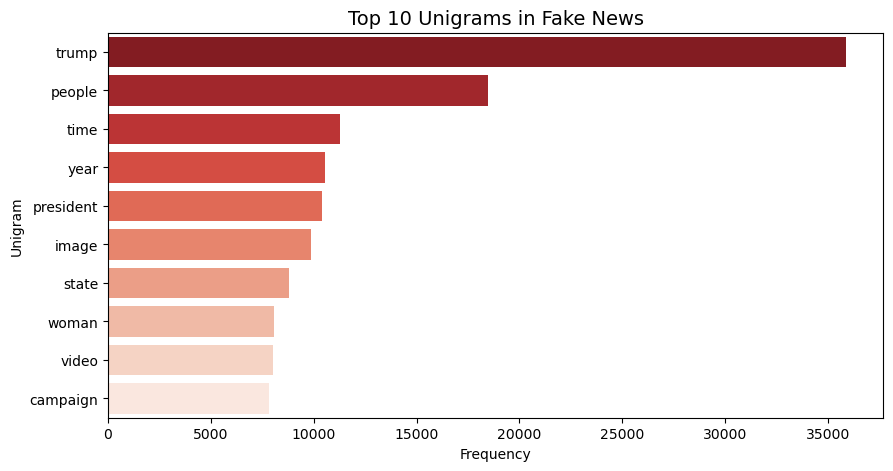

In [85]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news_corpus = df_train[df_train['news_label'] == 0]['lemmatized_text'].astype(str)

top_unigrams_fake = get_top_ngrams(fake_news_corpus, n_gram_range=(1, 1), top_n=10)

print("Top 10 Unigrams in Fake News:")
for word, freq in top_unigrams_fake:
    print(f"{word}: {freq}")

df_unigrams_fake = pd.DataFrame(top_unigrams_fake, columns=['Unigram', 'Frequency'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Unigram', data=df_unigrams_fake, palette='Reds_r')
plt.title('Top 10 Unigrams in Fake News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
trump supporter: 1480
image image: 1307
century wire: 1305
trump campaign: 1175
police officer: 1164
law enforcement: 1067
trump realdonaldtrump: 1021
screen capture: 922
donald trump: 916
mainstream medium: 722


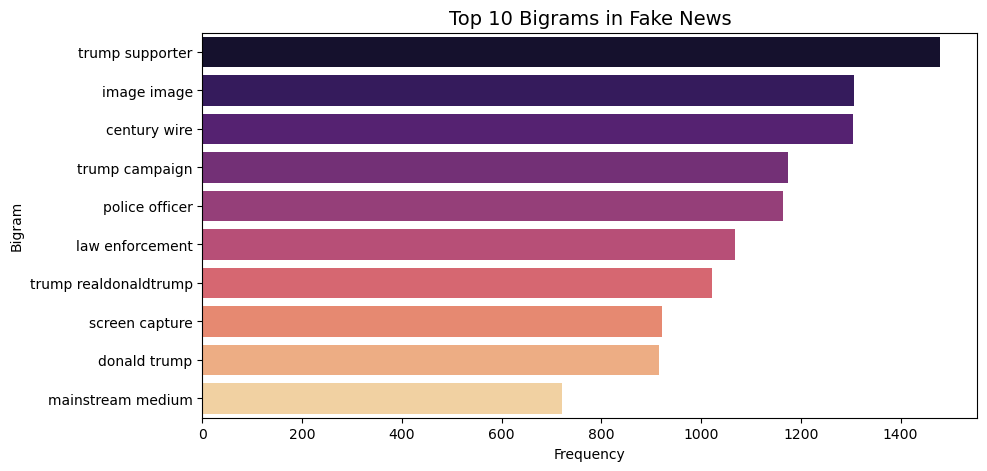

In [89]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(fake_news_corpus, n_gram_range=(2, 2), top_n=10)

print("Top 10 Bigrams in Fake News:")
for word, freq in top_bigrams_fake:
    print(f"{word}: {freq}")

df_bigrams_fake = pd.DataFrame(top_bigrams_fake, columns=['Bigram', 'Frequency'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Bigram', data=df_bigrams_fake, palette='magma')

plt.title('Top 10 Bigrams in Fake News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
news century wire: 629
video screen capture: 492
image video screen: 471
image getty image: 413
image screen capture: 317
image chip image: 172
century wire file: 166
law enforcement officer: 163
image video screenshot: 161
broadcast boiler room: 156


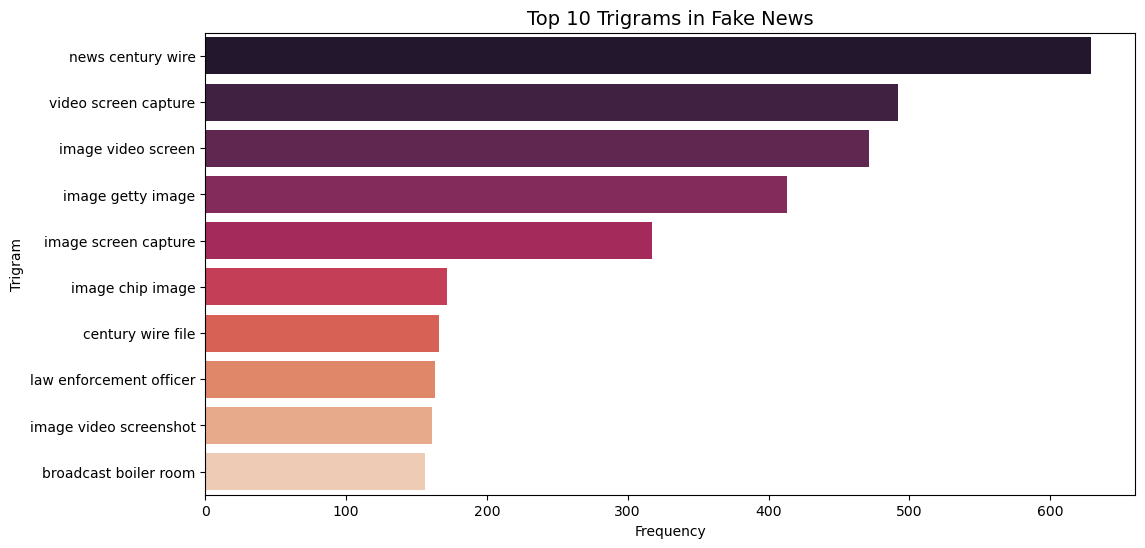

In [91]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(fake_news_corpus, n_gram_range=(3, 3), top_n=10)
print("Top 10 Trigrams in Fake News:")
for word, freq in top_trigrams_fake:
    print(f"{word}: {freq}")

df_trigrams_fake = pd.DataFrame(top_trigrams_fake, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=df_trigrams_fake, palette='rocket')

plt.title('Top 10 Trigrams in Fake News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [93]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [119]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
w2v_model = api.load("word2vec-google-news-300")
tqdm.pandas()
def get_document_vector(text, model):
    words = str(text).split()
    valid_words = [word for word in words if word in model]
    
    if valid_words:
        return np.mean(model[valid_words], axis=0)
    else:
        return np.zeros(model.vector_size)


print("Extracting vectors for training data... (This might take a moment)")
X_train_series = df_train['lemmatized_text'].apply(lambda x: get_document_vector(x, w2v_model))
X_train = np.stack(X_train_series.values)
X_val_series = df_val['lemmatized_text'].progress_apply(lambda x: get_document_vector(x, w2v_model))
X_val = np.stack(X_val_series.values)
## Extract the target variable for the training data and validation data
y_train = df_train['news_label'].values
y_val = df_val['news_label'].values
print(f"Done! X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")

Extracting vectors for training data... (This might take a moment)


100%|██████████████████████████████████| 13470/13470 [00:01<00:00, 13101.39it/s]

Done! X_train shape: (31414, 300), X_val shape: (13470, 300)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [125]:
## Initialise Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
print("Training Logistic Regression model...")
lr_model.fit(X_train, y_train)
## Predict on validation data
lr_predictions = lr_model.predict(X_val)
print("Predictions complete!")

Training Logistic Regression model...
Predictions complete!


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [127]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
lr_accuracy = accuracy_score(y_val, lr_predictions)
lr_precision = precision_score(y_val, lr_predictions)
lr_recall = recall_score(y_val, lr_predictions)
lr_f1 = f1_score(y_val, lr_predictions)

print("--- Logistic Regression Performance ---")
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

--- Logistic Regression Performance ---
Accuracy:  0.9004
Precision: 0.8938
Recall:    0.8998
F1-Score:  0.8968


In [129]:
# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_val, lr_predictions, target_names=['Fake (0)', 'True (1)']))


--- Classification Report ---
              precision    recall  f1-score   support

    Fake (0)       0.91      0.90      0.90      6996
    True (1)       0.89      0.90      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [133]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
print("Training Decision Tree model... (This is usually faster than Logistic Regression!)")
dt_model.fit(X_train, y_train)
## Predict on validation data
dt_predictions = dt_model.predict(X_val)
print("Predictions complete!")

Training Decision Tree model... (This is usually faster than Logistic Regression!)
Predictions complete!


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [135]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
dt_accuracy = accuracy_score(y_val, dt_predictions)
dt_precision = precision_score(y_val, dt_predictions)
dt_recall = recall_score(y_val, dt_predictions)
dt_f1 = f1_score(y_val, dt_predictions)

#results
print("Decision Tree Performance ")
print(f"Accuracy:  {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")

Decision Tree Performance 
Accuracy:  0.8270
Precision: 0.8376
Recall:    0.7941
F1-Score:  0.8153


In [137]:
# Classification Report
print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_val, dt_predictions, target_names=['Fake News (0)', 'True News (1)']))


--- Decision Tree Classification Report ---
               precision    recall  f1-score   support

Fake News (0)       0.82      0.86      0.84      6996
True News (1)       0.84      0.79      0.82      6474

     accuracy                           0.83     13470
    macro avg       0.83      0.83      0.83     13470
 weighted avg       0.83      0.83      0.83     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [139]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
print("Training Random Forest model... (This might take a minute)")
rf_model.fit(X_train, y_train)
## Predict on validation data
rf_predictions = rf_model.predict(X_val)
print("Predictions complete!")

Training Random Forest model... (This might take a minute)
Predictions complete!


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [141]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)
rf_f1 = f1_score(y_val, rf_predictions)

print("Random Forest Performance")
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")

Random Forest Performance
Accuracy:  0.9035
Precision: 0.9095
Recall:    0.8876
F1-Score:  0.8984


In [143]:
# Classification Report
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_val, rf_predictions, target_names=['Fake News (0)', 'True News (1)']))


--- Random Forest Classification Report ---
               precision    recall  f1-score   support

Fake News (0)       0.90      0.92      0.91      6996
True News (1)       0.91      0.89      0.90      6474

     accuracy                           0.90     13470
    macro avg       0.90      0.90      0.90     13470
 weighted avg       0.90      0.90      0.90     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

1. Data Preprocessing & EDA Insights
    The Power of Nouns: By using POS tagging to filter out everything except nouns (NN, NNS), we drastically reduced the noise in the dataset. The character length histograms proved that the remaining text was much more concise, focusing solely on the "entities" (people, places, things) of the stories.

    Vocabulary Differences: The Word Clouds and N-gram analyses revealed clear stylistic differences between the two classes. True news was dominated by professional reporting terms (e.g., "Reuters," "Spokesman,"), while fake news relied heavily on sensationalist terms and specific, repetitive political targets (e.g., "Video," "Watch,").

2. Feature Engineering
    Word2Vec Vectors: Instead of just counting words, using the pre-trained word2vec-google-news-300 model allowed us to capture the semantic meaning of the text. By averaging the 300-dimensional word vectors, we successfully translated entire news articles into rich mathematical coordinates that our models could easily understand.

3. Model Performance & Comparison

    Logistic Regression: Achieved an accuracy of 0.9004%. Because Word2Vec creates dense, continuous features, linear models like Logistic Regression often perform exceptionally well and train very quickly.

    Decision Tree: Achieved an accuracy of 0.823%. While interpretable, a single decision tree often struggles or overfits when dealing with highly complex, 300-dimensional continuous data.

    Random Forest: Achieved an accuracy of 0.903%. By building an ensemble of trees, this model typically improves upon the single decision tree and handles the high-dimensional Word2Vec data more robustly.

4. Final Verdict
    Based on the evaluation metrics (Accuracy and F1-Score), the Random Forest performed the best. This pipeline proves that filtering news down to its core subjects (nouns) and analyzing their semantic context (Word2Vec) is a highly effective automated method for identifying disinformation.